In [110]:
import numpy as np

In [129]:
import bnpy

In [130]:
from matplotlib import pylab
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Create dataset

In [131]:
prng = np.random.RandomState(0)
X_a_NaD = -2.0 + 0.1 * prng.randn(500, 2) # Lots of points at (-2, -2)
X_b_NbD =  2.0 + 0.1 * prng.randn(500, 2) # Lots of poitns at (2, 2)
X_c_NcD = [-2, 2] + 0.1 * prng.randn(5, 2)   # Very few points at (-2, 2)
X_ND = np.vstack([X_a_NaD, X_b_NbD, X_c_NcD])
prng.shuffle(X_ND)
data = bnpy.data.XData(X_ND)

In [158]:
info_list = list()
for ii in xrange(1):
    GP, info_dict = bnpy.train_model(
        data, 'dp_mix_vb', 'gauss_diag_covar_vb', 'coord_descent',
        n_laps=5, 
        K=10,
        init_procedure='LP_from_rand_examples',
        seed=ii)
    info_list.append(info_dict)

User input
-- K 10
-- init_procedure LP_from_rand_examples
-- n_laps 5
-- seed 0
Dataset
  num examples: 1005
  num dims: 2
Initialization
Training...
-2.73911e+03
-2.76575e+03
-2.79320e+03
-2.80132e+03
-2.81105e+03


In [159]:
model = bnpy.alloc_models.hierarchical_model.make_model(info_dict['mod_list'], GP, None)

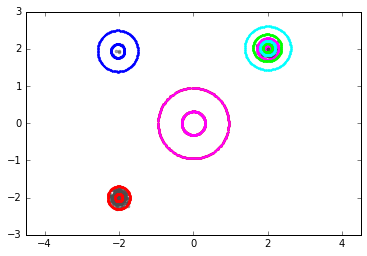

In [161]:
bnpy.viz.gauss_viz.plot_gauss_2D_from_common_params(
    data=data, **common_GP)
#pylab.plot(data.X[:, 0], data.X[:, 1], 'k.');